# Twitter Sentiment Analysis
Author: Brenda De Leon

#### Libraries

In [818]:
# importing relevant libraries
# !pip install wordcloud
# !pip install nltk
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random # generating random numbers
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string
from PIL import Image # for opening, manipulating, and saving many different image file f
from textwrap import wrap
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_validate
from matplotlib import cm
from nltk import FreqDist, pos_tag 
from nltk.tokenize import RegexpTokenizer, TweetTokenizer, word_tokenize
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/brendadeleon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Data

In [819]:
# importing data
df = pd.read_csv('data/clean_df.csv')
# previewing data
df.head()

,level_0,index,Tweet,Brand_or_Product,Sentiment,target,clean_tweets,preprocessed_tweets,brand,brand_sorted,...,capital_word_count,punct_count,quoted_word_count,sent_count,unique_word_count,stopword_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words
0,0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Negative,i have a 3g iphone after 3 hrs tweeting at it ...,wesley g iphone hr tweet rise austin dead need...,Apple,Apple,...,4,"{'! count': 1, '"" count': 0, '# count': 2, '$ ...",0,5,21,7,5.521739,4.600000,0.913043,0.304348
1,1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Positive,know about awesome ipad iphone app that you'll...,jessedee know fludapp awesome ipad iphone app ...,Apple,Apple,...,1,"{'! count': 0, '"" count': 0, '# count': 1, '$ ...",0,3,22,7,6.318182,7.333333,1.000000,0.318182
2,2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Positive,can not wait for 2 also they should sale them ...,swonderlin wait ipad also sale sxsw,Apple,Apple,...,1,"{'! count': 0, '"" count': 0, '# count': 2, '$ ...",0,2,15,6,5.266667,7.500000,1.000000,0.400000
3,3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Negative,i hope this year's festival isn't as crashy as...,sxsw hope year festival crashy year iphone app...,Apple,Apple,...,1,"{'! count': 0, '"" count': 0, '# count': 1, '$ ...",0,2,12,5,5.466667,7.500000,0.800000,0.333333
4,4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Positive,great stuff on fri marissa mayer google tim o'...,sxtxstate great stuff fri sxsw marissa mayer g...,Google,Google,...,1,"{'! count': 0, '"" count': 0, '# count': 1, '$ ...",0,1,17,1,7.705882,17.000000,1.000000,0.058824


In [820]:
df.columns

Index(['level_0', 'index', 'Tweet', 'Brand_or_Product', 'Sentiment', 'target',
       'clean_tweets', 'preprocessed_tweets', 'brand', 'brand_sorted',
       'hashtags', 'htag_count', 'mentions', 'mention_count', 'char_count',
       'word_count', 'capital_char_count', 'capital_word_count', 'punct_count',
       'quoted_word_count', 'sent_count', 'unique_word_count',
       'stopword_count', 'avg_wordlength', 'avg_sentlength', 'unique_vs_words',
       'stopwords_vs_words'],
      dtype='object')

In [821]:
# import english stop word list and add additional strings to list
sw_list = stopwords.words(['english'])
sw_list += list(string.punctuation)
sw_list += ["''", '""', "...", 'e``', '"', '"', '#sxsw', '@sxsw', 'sxsw', 'says', '-', 'com', '@mention', 'mention', 'rt', '{link}', 'link', 'i', 'w/', '&amp;', '&amp','amp;', 'amp', "'ll", "'s", "n't", 'get', "'re", 'sxsw.', 'sxswi', 'quot', 'http', '//bit.ly/ieavob', '//j.mp/grn7pk', 'also', '//bit.ly/', "'m", 'via', "'ve", '//t.co/', 'v', '//bit.ly', '���', 'one']
sw_set = set(sw_list)

## Exploratory Data Analysis

### Corpus Statistics

### Most Frequent Words
Since this is clasification we want comparative visuals. 
##### Most Frequent Words by Brand

In [823]:
df['brand_sorted'].value_counts()

Apple     5385
Google    2539
Name: brand_sorted, dtype: int64

In [824]:
# separate data by the two brands 
df_freq_apple = df[df['brand_sorted']=='Apple']
df_freq_google = df[df['brand_sorted']=='Google']

In [825]:
# separate tweets by the two brands
apple_data = df_freq_apple['Tweet']
google_data = df_freq_google['Tweet']

In [826]:
# make data into list of tweets
data_apple= apple_data.to_list()
data_google = google_data.to_list()

In [827]:
# join list of tweets on ","
data_apple = ",".join(data_apple)
data_google = ",".join(data_google)

In [828]:
# tokenize list of joined apple tweets
apple_tokens = word_tokenize(data_apple)
# lowercase all tokens and only keep tokens not in stopword list
apple_stopped = [token.lower() for token in apple_tokens if token.lower() not in sw_list]

In [829]:
# tokenize list of joined google tweets
google_tokens = word_tokenize(data_google)
# lowercase all tokens and only keep tokens not in stopword list
google_stopped = [token.lower() for token in google_tokens if token.lower() not in sw_list]

In [830]:
# similar step as earlier. making separated brand tweets into a list and splitting tweets into words (sw not removed)
pros_apple = [d.split() for d in apple_data.to_list()]
pros_google = [d.split() for d in google_data.to_list()]

In [831]:
# counting unique apple vocabulary
total_vocab_apple = set()
for tweet in pros_apple:
    total_vocab_apple.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_vocab_apple)

11069

In [832]:
# counting unique apple vocabulary
total_vocab_google = set()
for tweet in pros_google:
    total_vocab_google.update([word.lower() for word in tweet if word.lower() not in sw_list])
len(total_vocab_google)

6173

In [833]:
# to look at frequency distributions
apple_freq = FreqDist(apple_stopped)
google_freq = FreqDist(google_stopped)

In [834]:
# top 25 apple words:
apple_freq.most_common(25)

[('ipad', 2316),
 ('apple', 2151),
 ('iphone', 1429),
 ('store', 1359),
 ('2', 1022),
 ('austin', 757),
 ('app', 617),
 ('new', 506),
 ('ipad2', 422),
 ('pop-up', 379),
 ('line', 366),
 ('temporary', 251),
 ('free', 239),
 ('opening', 239),
 ('downtown', 210),
 ('launch', 199),
 ('popup', 194),
 ('android', 192),
 ('like', 181),
 ('open', 175),
 ('apps', 160),
 ('time', 159),
 ('today', 147),
 ('need', 146),
 ('people', 143)]

In [835]:
# top 25 google words:
google_freq.most_common(25)

[('google', 2308),
 ('circles', 619),
 ('social', 545),
 ('new', 523),
 ('network', 428),
 ('launch', 412),
 ('today', 373),
 ('android', 350),
 ('called', 334),
 ('major', 287),
 ('possibly', 233),
 ('party', 229),
 ('mayer', 179),
 ('mobile', 177),
 ('maps', 159),
 ('marissa', 153),
 ('app', 116),
 ('search', 109),
 ('time', 86),
 ('bing', 81),
 ('austin', 80),
 ('big', 80),
 ('like', 78),
 ('location', 74),
 ('panel', 70)]

##### Normalized Word Frequencies by Brand

In [ ]:
positive_total_word_count = sum(positive_freq.values())
positive_top_25 = positive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in positive_top_25:
    normalized_frequency = word[1]/positive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

In [836]:
google_total_word_count = sum(google_freq.values())
google_top_25 = google_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in google_top_25:
    normalized_frequency = word[1]/google_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

google 		 0.0951
circles 		 0.02551
social 		 0.02246
new 		 0.02155
network 		 0.01764
launch 		 0.01698
today 		 0.01537
android 		 0.01442
called 		 0.01376
major 		 0.01183
possibly 		 0.009601
party 		 0.009436
mayer 		 0.007376
mobile 		 0.007294
maps 		 0.006552
marissa 		 0.006305
app 		 0.00478
search 		 0.004492
time 		 0.003544
bing 		 0.003338
austin 		 0.003297
big 		 0.003297
like 		 0.003214
location 		 0.003049
panel 		 0.002884


##### Most Frequent Words by Sentiment

In [697]:
df['target'].value_counts()

Neutral     4535
Positive    2845
Negative     544
Name: target, dtype: int64

In [698]:
# separate data by the three sentiments/classes
df_freq_positive = df[df['target']=='Positive']
df_freq_negative = df[df['target']=='Negative']
df_freq_neutral = df[df['target']=='Neutral']

In [699]:
# separate tweets by the three sentiments/classes
positive_data = df_freq_positive['Tweet']
negative_data = df_freq_negative['Tweet']
neutral_data = df_freq_neutral['Tweet']

In [700]:
# make data into list of tweets
data_positive = positive_data.to_list()
data_negative = negative_data.to_list()
data_neutral = neutral_data.to_list()

In [701]:
# join list of tweets on ","
data_positive = ",".join(data_positive)
data_negative = ",".join(data_negative)
data_neutral = ",".join(data_neutral)

In [702]:
# tokenize list of joined positive tweets
positive_tokens = word_tokenize(data_positive)
# lowercase all tokens and only keep tokens not in stopword list
pos_stopped = [token.lower() for token in positive_tokens if token.lower() not in sw_list]

In [703]:
# tokenize list of joined negative tweets
negative_tokens = word_tokenize(data_negative)
# lowercase all tokens and only keep tokens not in stopword list
neg_stopped = [token.lower() for token in negative_tokens if token.lower() not in sw_list]

In [704]:
# tokenize list of joined neutral tweets
neutral_tokens = word_tokenize(data_neutral)
# lowercase all tokens and only keep tokens not in stopword list
neu_stopped = [token.lower() for token in neutral_tokens if token.lower() not in sw_list]

In [705]:
# similar step as earlier. splitting tweets into lists and separating them by positive and negative
pros_positive = [d.split() for d in positive_data.to_list()]
pros_negative = [d.split() for d in negative_data.to_list()]
pros_neutral = [d.split() for d in neutral_data.to_list()]

In [706]:
# counting unique positive vocabulary
total_vocab_positive = set()
for comment in pros_positive:
    total_vocab_positive.update([c.lower() for c in comment])
len(total_vocab_positive)

7687

In [707]:
# counting unique positive vocabulary
total_vocab_positive = set()
for comment in pos_stopped:
    total_vocab_positive.update([c.lower() for c in comment])
len(total_vocab_positive)

60

In [708]:
# counting unique negative vocabulary
total_vocab_negative = set()
for comment in pros_negative:
    total_vocab_negative.update([c.lower() for c in comment])
len(total_vocab_negative)

2763

In [709]:
# counting unique negative vocabulary
total_vocab_neutral = set()
for comment in pros_neutral:
    total_vocab_neutral.update([c.lower() for c in comment])
len(total_vocab_neutral)

10385

In [710]:
# to look at frquency distributions
positive_freq = FreqDist(pos_stopped)
negative_freq = FreqDist(neg_stopped)
neutral_freq = FreqDist(neu_stopped)

In [711]:
# top 25 positive words:
positive_freq.most_common(25)

[('ipad', 969),
 ('apple', 893),
 ('google', 688),
 ('store', 521),
 ('iphone', 504),
 ('2', 473),
 ('app', 365),
 ('new', 352),
 ('austin', 279),
 ('ipad2', 194),
 ('android', 186),
 ('launch', 153),
 ('pop-up', 146),
 ('one', 134),
 ('great', 130),
 ('party', 129),
 ('line', 126),
 ('social', 122),
 ('time', 121),
 ('free', 117),
 ('circles', 116),
 ('cool', 114),
 ('today', 110),
 ('like', 107),
 ('maps', 100)]

In [712]:
# top 25 negative words:
negative_freq.most_common(25)

[('ipad', 182),
 ('iphone', 154),
 ('google', 138),
 ('apple', 115),
 ('2', 63),
 ('app', 58),
 ('store', 43),
 ('new', 41),
 ('like', 39),
 ('circles', 32),
 ('social', 30),
 ('design', 27),
 ('people', 27),
 ('apps', 26),
 ('need', 25),
 ('android', 22),
 ('austin', 22),
 ('one', 22),
 ('launch', 21),
 ('would', 20),
 ('think', 18),
 ('today', 17),
 ('line', 16),
 ('headaches', 16),
 ('long', 16)]

In [713]:
# top 25 neutral words:
neutral_freq.most_common(25)

[('google', 1607),
 ('ipad', 1165),
 ('apple', 1144),
 ('store', 802),
 ('iphone', 771),
 ('new', 636),
 ('austin', 535),
 ('2', 523),
 ('circles', 476),
 ('social', 453),
 ('launch', 437),
 ('today', 393),
 ('network', 341),
 ('android', 335),
 ('app', 310),
 ('called', 274),
 ('line', 242),
 ('major', 225),
 ('pop-up', 221),
 ('mobile', 217),
 ('ipad2', 216),
 ('possibly', 187),
 ('free', 167),
 ('temporary', 162),
 ('party', 160)]

##### Normalized Word Frequencies by Sentiment

In [714]:
positive_total_word_count = sum(positive_freq.values())
positive_top_25 = positive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in positive_top_25:
    normalized_frequency = word[1]/positive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

ipad 		 0.03506
apple 		 0.03231
google 		 0.02489
store 		 0.01885
iphone 		 0.01824
2 		 0.01711
app 		 0.01321
new 		 0.01274
austin 		 0.01009
ipad2 		 0.007019
android 		 0.00673
launch 		 0.005536
pop-up 		 0.005283
one 		 0.004848
great 		 0.004704
party 		 0.004667
line 		 0.004559
social 		 0.004414
time 		 0.004378
free 		 0.004233
circles 		 0.004197
cool 		 0.004125
today 		 0.00398
like 		 0.003871
maps 		 0.003618


In [715]:
negative_total_word_count = sum(negative_freq.values())
negative_top_25 = negative_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in negative_top_25:
    normalized_frequency = word[1]/negative_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

ipad 		 0.03334
iphone 		 0.02821
google 		 0.02528
apple 		 0.02107
2 		 0.01154
app 		 0.01062
store 		 0.007877
new 		 0.007511
like 		 0.007144
circles 		 0.005862
social 		 0.005496
design 		 0.004946
people 		 0.004946
apps 		 0.004763
need 		 0.00458
android 		 0.00403
austin 		 0.00403
one 		 0.00403
launch 		 0.003847
would 		 0.003664
think 		 0.003297
today 		 0.003114
line 		 0.002931
headaches 		 0.002931
long 		 0.002931


In [716]:
neutral_total_word_count = sum(neutral_freq.values())
neutral_top_25 = neutral_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in neutral_top_25:
    normalized_frequency = word[1]/neutral_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

google 		 0.03786
ipad 		 0.02745
apple 		 0.02695
store 		 0.01889
iphone 		 0.01816
new 		 0.01498
austin 		 0.0126
2 		 0.01232
circles 		 0.01121
social 		 0.01067
launch 		 0.0103
today 		 0.009259
network 		 0.008034
android 		 0.007892
app 		 0.007303
called 		 0.006455
line 		 0.005701
major 		 0.005301
pop-up 		 0.005207
mobile 		 0.005112
ipad2 		 0.005089
possibly 		 0.004406
free 		 0.003934
temporary 		 0.003817
party 		 0.003769


##### Most Frequent Words by Brand and Sentiment

# !!!!!!!!!! ^^^^^^^^^^^^^^^^^^^^^^ !!!!!!!!!!!!!!!!!!!!

# try doing all the same steps with both filters

## Visualizations

### Bar Graphs

In [840]:
# set color of our bar graphs
color = cm.Blues_r(np.linspace(.4,.8,30))

##### Bar Graphs by Brand

In [ ]:
# creating counts of positive and negative with values and words
positive_bar_counts = [x[1] for x in positive_freq.most_common(25)]
positive_bar_words = [x[0] for x in positive_freq.most_common(25)]
# same for negative
negative_bar_counts = [x[1] for x in negative_freq.most_common(25)]
negative_bar_words = [x[0] for x in negative_freq.most_common(25)]
# same for neutral
neutral_bar_counts = [x[1] for x in neutral_freq.most_common(25)]
neutral_bar_words = [x[0] for x in neutral_freq.most_common(25)]

In [ ]:
# fix ^  code box

##### Bar Graphs by Sentiment

In [717]:
# creating counts of positive and negative with values and words
positive_bar_counts = [x[1] for x in positive_freq.most_common(25)]
positive_bar_words = [x[0] for x in positive_freq.most_common(25)]
# same for negative
negative_bar_counts = [x[1] for x in negative_freq.most_common(25)]
negative_bar_words = [x[0] for x in negative_freq.most_common(25)]
# same for neutral
neutral_bar_counts = [x[1] for x in neutral_freq.most_common(25)]
neutral_bar_words = [x[0] for x in neutral_freq.most_common(25)]

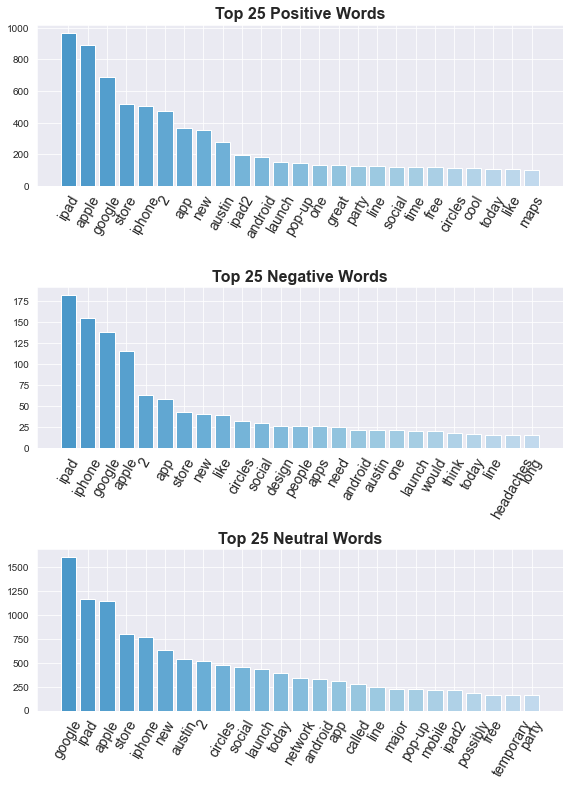

In [719]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,11))

# generating positive bar plot on first axes
axes[0].bar(positive_bar_words, positive_bar_counts, color=color)
axes[0].set_title('Top 25 Positive Words', weight='bold', fontsize=16)
# generating negative bar plot on second axes
axes[1].bar(negative_bar_words, negative_bar_counts, color=color)
axes[1].set_title('Top 25 Negative Words', weight='bold', fontsize=16)
# generating neutral bar plot on third axes
axes[2].bar(neutral_bar_words, neutral_bar_counts, color=color)
axes[2].set_title('Top 25 Neutral Words', weight='bold', fontsize=16)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)

plt.tight_layout(pad=1)
plt.savefig('word count bar graphs.png')
plt.show();

### Word Clouds
We will display the most frequent words in a wordcloud and look for patterns. The more frequently occurring words will take up more space in the word cloud, the more frequent words are both larger and with darker hues.

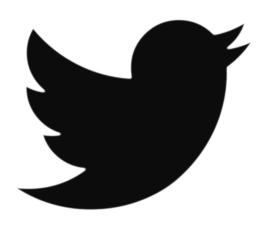

In [759]:
# import twitter logo
image = np.array(Image.open('twitter_mask.png'))
# prepare image array to show as an image
plt.imshow(image, interpolation='bilinear') 
# remove axis and show the image
plt.axis('off') 
plt.show(); 

In [722]:
# create a function that generates a set saturation range of the twitter blue color using hsl color code
def twitter_blue(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(203, 100%%, %d%%)" % random.randint(45, 80)

#### Word Clouds by Brand

#### Word Clouds by Sentiment

In [723]:
# getting data into a dictionary (dict(zip(keys, values)))
from wordcloud import WordCloud
positive_dictionary = dict(zip(positive_bar_words, positive_bar_counts))
negative_dictionary = dict(zip(negative_bar_words, negative_bar_counts))
neutral_dictionary = dict(zip(neutral_bar_words, neutral_bar_counts))

##### Positive Word Cloud

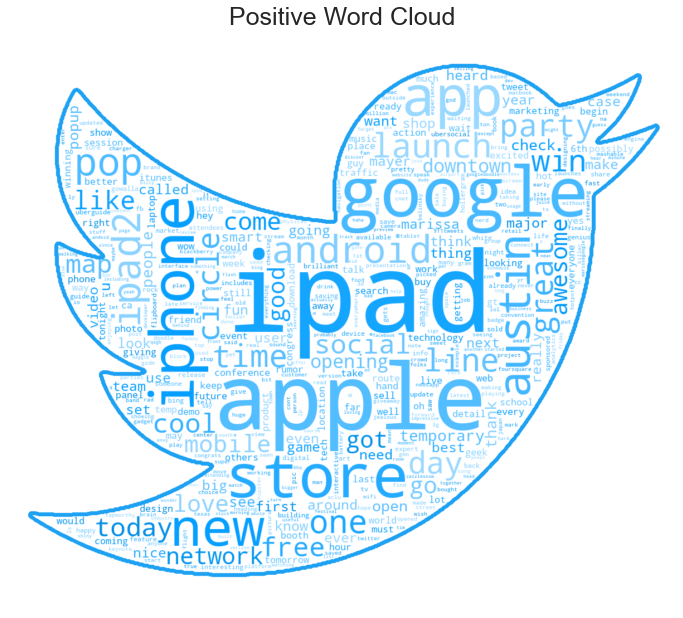

In [760]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=500, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for positive words only
wordcloud.generate(','.join(pos_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Positive Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Negative Word Cloud

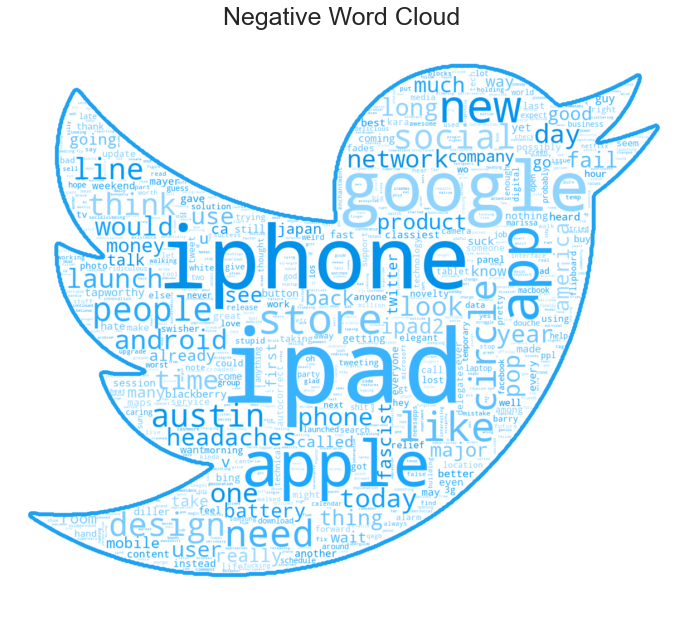

In [753]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=750, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for negative words only
wordcloud.generate(','.join(neg_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Negative Word Cloud', 
          size=25)
plt.axis('off')
plt.show();

##### Neutral Word Cloud

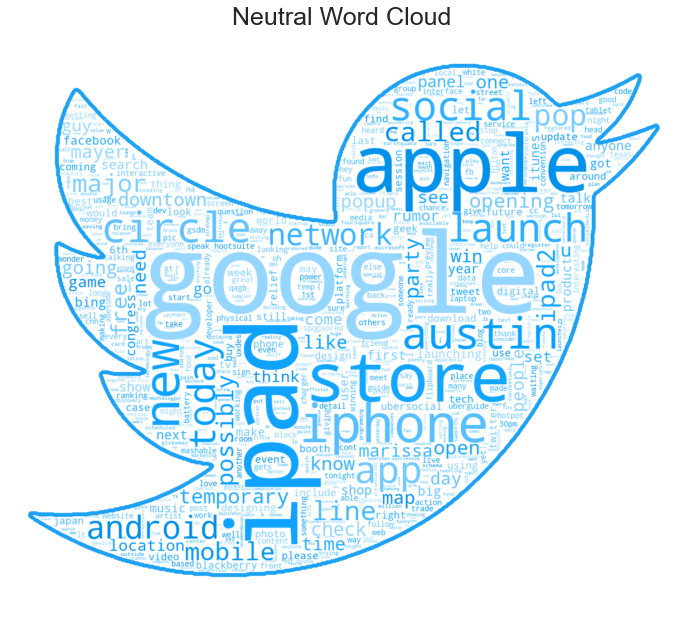

In [756]:
# instantiate the word cloud object with twitter image mask  
wordcloud = WordCloud(stopwords=sw_list,
                      collocations=False, 
                      background_color='white', 
                      max_words=750, 
                      mask=image,
                      contour_color='#1DA1F2',
                      contour_width=10)
# generate a word cloud for neutral words only
wordcloud.generate(','.join(neu_stopped))
# display the word cloud
plt.figure(figsize=(12,12), 
           facecolor=None)
# recolor word cloud with the twitter blue color function, setting random state for reproducability
plt.imshow(wordcloud.recolor(color_func=twitter_blue, random_state=42),
           interpolation='bilinear')
# setting a title for the word cloud
plt.title('Neutral Word Cloud', 
          size=25)
plt.axis('off')
plt.show();